In [1]:
#import the data, specify data types
import pandas as pd
df = pd.read_csv('Data/Online_Retail_Data_Set.csv',
                 encoding="ISO-8859-1",
                 dtype={'CustomerID': str,'InvoiceID': str})
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France


In [2]:
df.InvoiceDate = pd.to_datetime(df.InvoiceDate, format="%m/%d/%Y %H:%M")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [3]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France


In [4]:
df.describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [5]:
import pandas_profiling as pp
pp.ProfileReport(df)

In [6]:
#remove the negative values and replace with nan
import numpy as np
df[df['Quantity'] < 0] = np.nan
df[df['UnitPrice'] < 0] = np.nan
df.describe()

,Quantity,UnitPrice
count,531283.000000,531283.000000
mean,10.655299,3.898954
std,156.830617,35.876279
min,1.000000,0.000000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,13541.330000


In [7]:
#get the total spent for each line item
df['total_dollars'] = df['Quantity']*df['UnitPrice']
df.describe()

,Quantity,UnitPrice,total_dollars
count,531283.000000,531283.000000,531283.000000
mean,10.655299,3.898954,20.077218
std,156.830617,35.876279,270.058254
min,1.000000,0.000000,0.000000
25%,1.000000,1.250000,3.750000
50%,3.000000,2.080000,9.900000
75%,10.000000,4.130000,17.700000
max,80995.000000,13541.330000,168469.600000


## Building a customer table

Let's aggregrate transaction data to learn more about our customers.

In [8]:
#how many orders have they made
invoice_ct = df.groupby(by='CustomerID', as_index=False)['InvoiceNo'].count()
invoice_ct.columns = ['CustomerID', 'NumberOrders']
invoice_ct.describe()

,NumberOrders
count,4339.000000
mean,91.708689
std,228.792852
min,1.000000
25%,17.000000
50%,41.000000
75%,100.000000
max,7847.000000


In [17]:
#how much money have they spent
total_spend = df.groupby(by='CustomerID', as_index=False)['total_dollars'].sum()
total_spend.columns = ['CustomerID', 'total_spent']
total_spend.describe()

,total_spent
count,4339.000000
mean,2053.793018
std,8988.248381
min,0.000000
25%,307.245000
50%,674.450000
75%,1661.640000
max,280206.020000


In [16]:
#how many items they bought
total_items = df.groupby(by='CustomerID', as_index=False)['Quantity'].sum()
total_items.columns = ['CustomerID', 'NumberItems']
total_items.describe()

,NumberItems
count,4339.000000
mean,1194.214335
std,5055.603049
min,1.000000
25%,160.000000
50%,379.000000
75%,993.000000
max,197491.000000


In [18]:
#when was their first order and how long ago was that from the last date in file (presumably
#when the data were pulled)
earliest_order = df.groupby(by='CustomerID', as_index=False)['InvoiceDate'].min()
earliest_order.columns = ['CustomerID', 'EarliestInvoice']
earliest_order['now'] = pd.to_datetime((df['InvoiceDate']).max())

earliest_order['days_as_customer'] = 1 + (earliest_order.now-earliest_order.EarliestInvoice).astype('timedelta64[D]')
earliest_order.drop('now', axis=1, inplace=True)
earliest_order

,CustomerID,EarliestInvoice,days_as_customer
0,12346,2011-01-18 10:01:00,326.0
1,12347,2010-12-07 14:57:00,367.0
2,12348,2010-12-16 19:09:00,358.0
3,12349,2011-11-21 09:51:00,19.0
4,12350,2011-02-02 16:01:00,310.0
...,...,...,...
4334,18280,2011-03-07 09:52:00,278.0
4335,18281,2011-06-12 10:53:00,181.0
4336,18282,2011-08-05 13:35:00,126.0
4337,18283,2011-01-06 14:14:00,337.0


In [19]:
#when was their last order and how long ago was that from the last date in file (presumably
#when the data were pulled)
last_order = df.groupby(by='CustomerID', as_index=False)['InvoiceDate'].max()
last_order.columns = ['CustomerID', 'last_purchase']
last_order['now'] = pd.to_datetime((df['InvoiceDate']).max())
last_order['days_since_purchase'] = 1 + (last_order.now-last_order.last_purchase).astype('timedelta64[D]')
last_order.drop('now', axis=1, inplace=True)
last_order.head()

,CustomerID,last_purchase,days_since_purchase
0,12346,2011-01-18 10:01:00,326.0
1,12347,2011-12-07 15:52:00,2.0
2,12348,2011-09-25 13:13:00,75.0
3,12349,2011-11-21 09:51:00,19.0
4,12350,2011-02-02 16:01:00,310.0


In [20]:
#combine all the dataframes into one
import functools
dfs = [total_spend,invoice_ct,earliest_order,last_order,total_items]
CustomerTable = functools.reduce(lambda left,right: pd.merge(left,right,on='CustomerID', how='outer'), dfs)
CustomerTable.head()

,CustomerID,total_spent,NumberOrders,EarliestInvoice,days_as_customer,last_purchase,days_since_purchase,NumberItems
0,12346,77183.60,1,2011-01-18 10:01:00,326.0,2011-01-18 10:01:00,326.0,74215.0
1,12347,4310.00,182,2010-12-07 14:57:00,367.0,2011-12-07 15:52:00,2.0,2458.0
2,12348,1797.24,31,2010-12-16 19:09:00,358.0,2011-09-25 13:13:00,75.0,2341.0
3,12349,1757.55,73,2011-11-21 09:51:00,19.0,2011-11-21 09:51:00,19.0,631.0
4,12350,334.40,17,2011-02-02 16:01:00,310.0,2011-02-02 16:01:00,310.0,197.0


In [13]:
#how many customers?
len(CustomerTable)

4339

In [21]:
CustomerTable.describe()

,total_spent,NumberOrders,days_as_customer,days_since_purchase,NumberItems
count,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000
mean,2053.793018,91.708689,223.259968,92.518322,1194.214335
std,8988.248381,228.792852,117.915703,100.009747,5055.603049
min,0.000000,1.000000,1.000000,1.000000,1.000000
25%,307.245000,17.000000,113.000000,18.000000,160.000000
50%,674.450000,41.000000,249.000000,51.000000,379.000000
75%,1661.640000,100.000000,327.000000,142.000000,993.000000
max,280206.020000,7847.000000,374.000000,374.000000,197491.000000


In [22]:
#identify and separate big spenders, lots of orders, long-time customers, dormant customers for
#sales and marketing campaign use; need to be separate flags because they aren't all mutually
#exclusive

def big_spender(row):
    if row['total_spent'] >= 1661.64:
        return 'Yes'
    else:
        return 'No'

def many_orders(row):
    if row['NumberOrders'] >= 100:
        return 'Yes'
    else:
        return 'No'

def loyal_customer(row):
    if row['days_as_customer'] >= 326:
        return 'Yes' 
    else:
        return 'No'

def dormant_customer(row):
    if row['days_since_purchase'] >= 141:
        return 'Yes' 
    else:
        return 'No'

CustomerTable['BigSpender'] = CustomerTable.apply(big_spender, axis=1)
CustomerTable['ManyOrders'] = CustomerTable.apply(many_orders, axis=1)
CustomerTable['LoyalCustomer'] = CustomerTable.apply(loyal_customer, axis=1)
CustomerTable['DormantCustomer'] = CustomerTable.apply(dormant_customer, axis=1)

CustomerTable['OrderFrequency'] = CustomerTable['NumberOrders']/CustomerTable['days_as_customer']

CustomerTable.head(10)

,CustomerID,total_spent,NumberOrders,EarliestInvoice,days_as_customer,last_purchase,days_since_purchase,NumberItems,BigSpender,ManyOrders,LoyalCustomer,DormantCustomer,OrderFrequency
0,12346,77183.60,1,2011-01-18 10:01:00,326.0,2011-01-18 10:01:00,326.0,74215.0,Yes,No,Yes,Yes,0.003067
1,12347,4310.00,182,2010-12-07 14:57:00,367.0,2011-12-07 15:52:00,2.0,2458.0,Yes,Yes,Yes,No,0.495913
2,12348,1797.24,31,2010-12-16 19:09:00,358.0,2011-09-25 13:13:00,75.0,2341.0,Yes,No,Yes,No,0.086592
3,12349,1757.55,73,2011-11-21 09:51:00,19.0,2011-11-21 09:51:00,19.0,631.0,Yes,No,No,No,3.842105
4,12350,334.40,17,2011-02-02 16:01:00,310.0,2011-02-02 16:01:00,310.0,197.0,No,No,No,Yes,0.054839
5,12352,2506.04,85,2011-02-16 12:33:00,297.0,2011-11-03 14:37:00,36.0,536.0,Yes,No,No,No,0.286195
6,12353,89.00,4,2011-05-19 17:47:00,204.0,2011-05-19 17:47:00,204.0,20.0,No,No,No,Yes,0.019608
7,12354,1079.40,58,2011-04-21 13:11:00,232.0,2011-04-21 13:11:00,232.0,530.0,No,No,No,Yes,0.250000
8,12355,459.40,13,2011-05-09 13:49:00,214.0,2011-05-09 13:49:00,214.0,240.0,No,No,No,Yes,0.060748
9,12356,2811.43,59,2011-01-18 09:50:00,326.0,2011-11-17 08:40:00,23.0,1591.0,Yes,No,Yes,No,0.180982


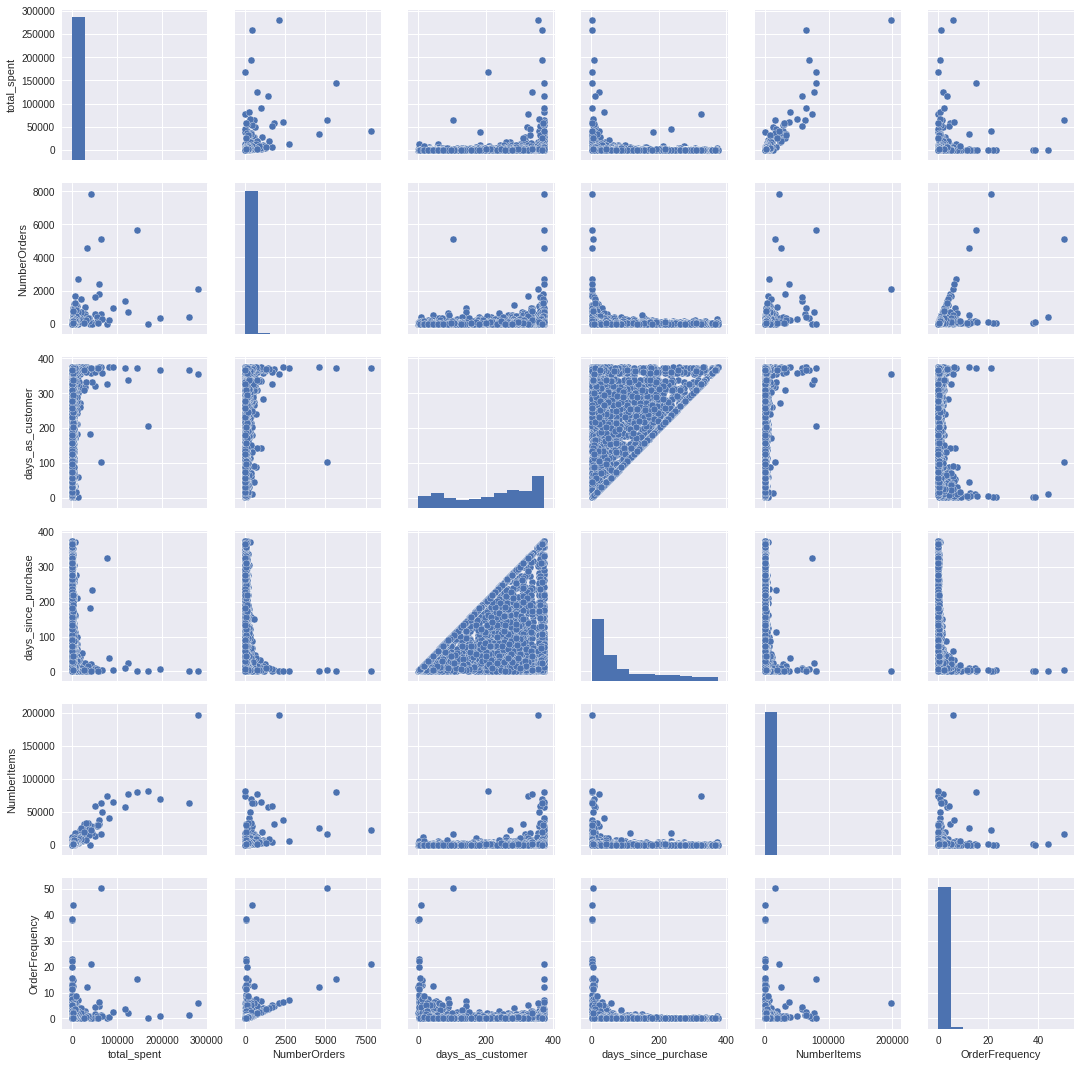

In [15]:
#look at the distributions and relationships with other continuous variables
import seaborn as sns
sns.pairplot(CustomerTable, vars=["total_spent", "NumberOrders",'days_as_customer',
                                  'days_since_purchase','NumberItems','OrderFrequency'])

In [23]:
RF = CustomerTable[["NumberOrders",'days_as_customer','NumberItems','BigSpender','CustomerID']]
features = RF.columns[:3]
features

Index(['NumberOrders', 'days_as_customer', 'NumberItems'], dtype='object')

In [25]:
RF['is_train'] = np.random.uniform(0, 1, len(RF)) <= .8
train, test = RF[RF['is_train']==True], RF[RF['is_train']==False]
print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:',len(test))

Number of observations in the training data: 3437
Number of observations in the test data: 902


c:\users\reddy\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
y = pd.factorize(train['BigSpender'])[0]
y[0:10] #show the first ten; 'No' = 0

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

In [27]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_jobs=2)
clf.fit(train[features], y)
list(zip(train[features], clf.feature_importances_))

[('NumberOrders', 0.3488112762571478),
 ('days_as_customer', 0.12522643064797276),
 ('NumberItems', 0.5259622930948795)]

In [28]:
clf.predict_proba(test[features])[0:10]

array([[0.67, 0.33],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.82, 0.18],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.85, 0.15],
       [0.  , 1.  ],
       [0.12, 0.88]])

In [29]:
test['Prediction'] = clf.predict(test[features])
test.head()

c:\users\reddy\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,NumberOrders,days_as_customer,NumberItems,BigSpender,CustomerID,is_train,Prediction
0,1,326.0,74215.0,Yes,12346,False,0
7,58,232.0,530.0,No,12354,False,1
8,13,214.0,240.0,No,12355,False,1
10,131,33.0,2708.0,Yes,12357,False,0
14,10,287.0,91.0,No,12361,False,1
